Import the libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [20]:
df = pd.read_csv("/kaggle/input/road-accident-severity-in-india/Road.csv")

Data Preprocessing
count the no. of rows and columns

In [21]:
df.shape

(12316, 32)

list the names of the columns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

display the summary of the dataframe

In [23]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


Data Cleaning

In [24]:
df[["Casualty_class", "Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity", "Work_of_casuality","Fitness_of_casuality"]].dropna()

,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality
3,Pedestrian,Female,18-30,3,Driver,Normal
5,Driver or rider,Male,31-50,3,Driver,Normal
6,Driver or rider,Female,18-30,3,Driver,Normal
8,Pedestrian,Male,Under 18,3,Driver,Normal
9,Passenger,Male,18-30,3,Driver,Normal
...,...,...,...,...,...,...
12311,na,na,na,na,Driver,Normal
12312,na,na,na,na,Driver,Normal
12313,Driver or rider,Male,31-50,3,Driver,Normal
12314,na,na,na,na,Driver,Normal


Data Visualization

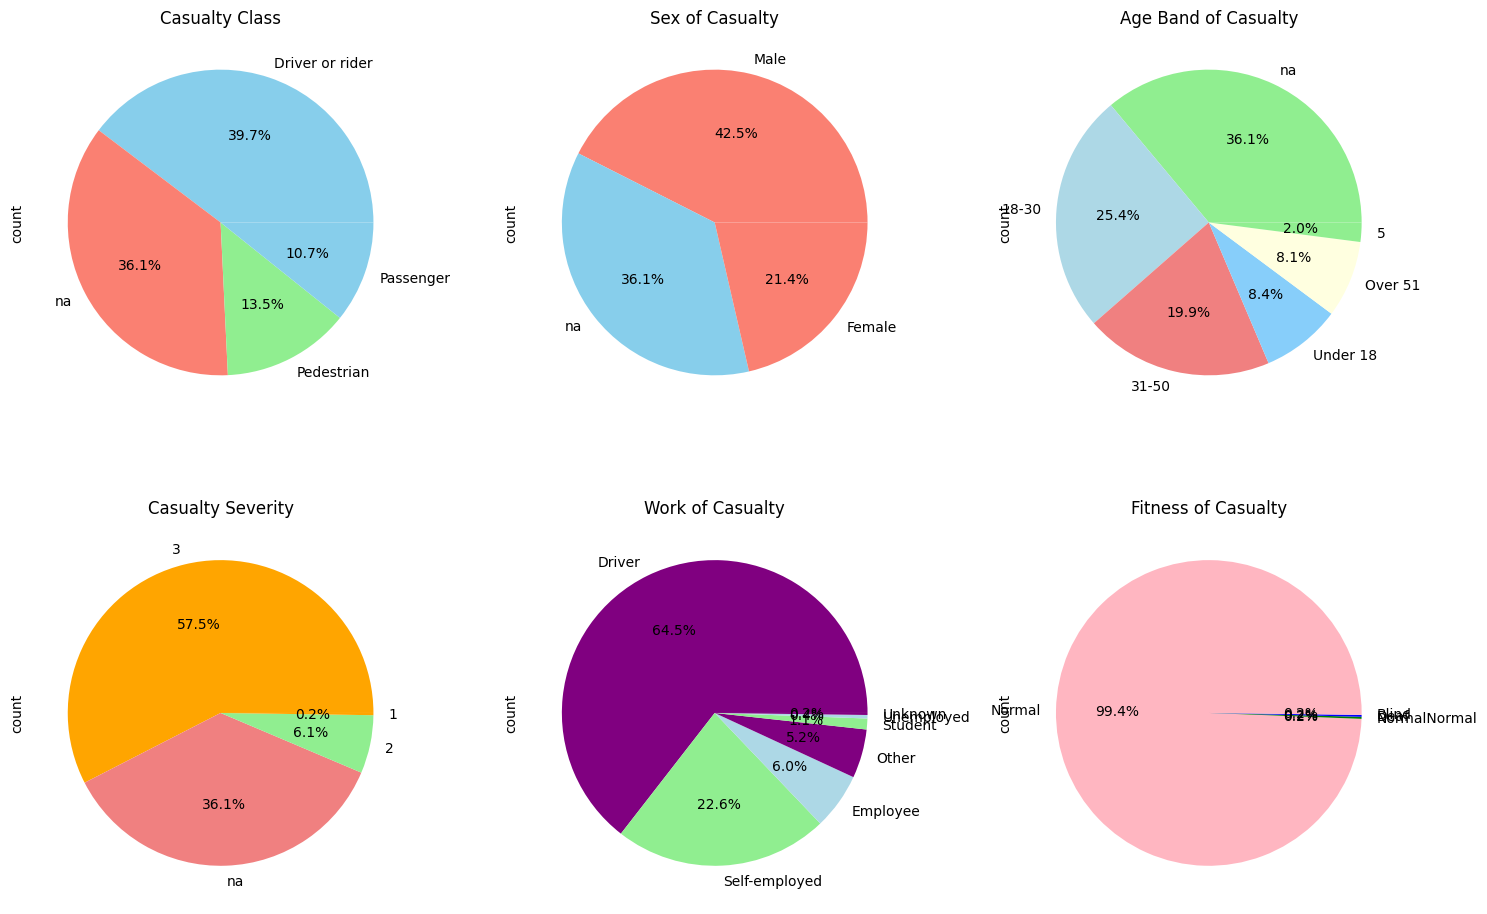

In [25]:
df_subset = df[["Casualty_class", "Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity", "Work_of_casuality","Fitness_of_casuality"]].dropna()
plt.figure(figsize=(15, 10))
plt.subplot(231)
df_subset['Casualty_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Casualty Class')
plt.subplot(232)
df_subset['Sex_of_casualty'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'skyblue'])
plt.title('Sex of Casualty')
plt.subplot(233)
df_subset['Age_band_of_casualty'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightyellow'])
plt.title('Age Band of Casualty')
plt.subplot(234)
df_subset['Casualty_severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightcoral', 'lightgreen'])
plt.title('Casualty Severity')
plt.subplot(235)
df_subset['Work_of_casuality'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['purple', 'lightgreen', 'lightblue'])
plt.title('Work of Casualty')
plt.subplot(236)
df_subset['Fitness_of_casuality'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightpink', 'green', 'blue'])
plt.title('Fitness of Casualty')
plt.tight_layout()
plt.show()

Decision Tree Model - split the cleaned dataset into train and test dataset then train the model after that evaluate the accuracy of the model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
label_encoders = {}
for column in df_subset.columns:
    label_encoders[column] = LabelEncoder()
    df_subset[column] = label_encoders[column].fit_transform(df_subset[column])
X = df_subset.drop(columns=['Casualty_severity'])
y = df_subset['Casualty_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))
print("\nFeature Importances:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance}")

Train Accuracy: 0.9361049107142857
Test Accuracy: 0.9363839285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.14      0.01      0.02       104
           2       0.90      0.99      0.95      1014
           3       1.00      1.00      1.00       670

    accuracy                           0.94      1792
   macro avg       0.51      0.50      0.49      1792
weighted avg       0.89      0.94      0.91      1792


Feature Importances:
Casualty_class: 0.006245086087055964
Sex_of_casualty: 0.9848176676359115
Age_band_of_casualty: 0.0040943976092289655
Work_of_casuality: 0.004037600739840383
Fitness_of_casuality: 0.0008052479279631135
